# Industrial Production Mining & Crude oil forecast

**Business Problem :** Predict the demand for Crude oil in future

**Dataset location :** [https://fred.stlouisfed.org/series/IPG211111CN](https://fred.stlouisfed.org/series/IPG211111CN)

This is the dataset from Fred Economic research about time series forecasting related to the Industrial Production mining & crude oil. Now day's there is lot of demand for oil and its product & to supply it worldwide we need to find out its usage value so that we can predict the crude oil requirement in future.

This Dataset is in Monthly frequency format available from 1972 to April 2019.

There are lot of technical & statisticals methods are available to forecast time series Problem, Here , we will Forecast the Crude oil prediction using below 3 technique

1. Using Facebook Prophet
2. Using LSTM with Keras
3. Using ARIMA and other models with statsmodels

So let's get started with Time series analysis.


## Facebook Prophet

In [91]:
# Analysis library
import pandas as pd

#visualization library
import matplotlib.pyplot as plt

# time series library
from fbprophet import Prophet
import warnings
from statsmodels.tools.eval_measures import rmse
from fbprophet.plot import add_changepoints_to_plot

In [92]:
warnings.filterwarnings('ignore')

### Data Analysis

1. Load the data into Jupiter notebood using Panda 
2. Display the first few row of the dataset
3. if you notice the column name of dataset which is not supported by Prophet
4. remane the columns with data.columns=['ds','y'] and change the data type of DATE columns which support Pandas date format
5. Dataset contain 586 rows with no missing values


In [93]:
data=pd.read_csv('IPG211111CN.csv').round(2)

In [94]:
data.head()

DATE  IPG211111CN
0  1972-01-01       141.51
1  1972-02-01       145.17
2  1972-03-01       147.29
3  1972-04-01       148.22
4  1972-05-01       149.78

In [95]:
data.columns=['ds','y']
data['ds']=pd.to_datetime(data['ds'])

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 2 columns):
ds    568 non-null datetime64[ns]
y     568 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.0 KB


### visualization

1. Plot the line graph for given data
2. from the below graph , with high level of analysis, its look like there is no trend or seasonality present in data, again we need to check data is stationary or not.

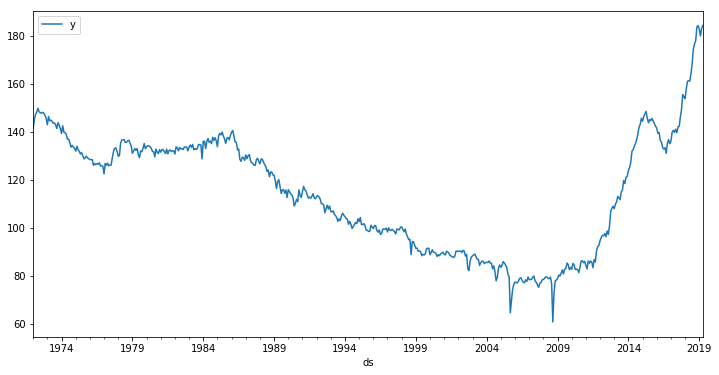

In [97]:
data.plot(figsize=(12,6),x='ds',y='y')

### Split the dataset for training & Testing purpose

In [98]:
train=data.iloc[:556]
test=data.iloc[556:]

### Model creation

1. As earlier mentioned, we are using fbprophet library for forecasting time series 
2. using Phophet(), lets initalize the model
3. then train the model using fit()
4. In prophet we need to use make_future_dataframe() wehere we need to give input for which we need to make forecasting and frequency of the datset
5. here we are providing periods=12 and freq='MS'
6. after predicting the future price, lets look into its results.
7. from forecast , we require only 2 columns 'ds' & 'yhat'

In [108]:
crude=Prophet(interval_width=0.95)
crude.fit(train)
future=crude.make_future_dataframe(12,freq='MS')
forecast=crude.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [109]:
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   1972-01-01  146.854320  139.032016  156.092119   146.854320   146.854320   
1   1972-02-01  146.527343  138.841021  154.724802   146.527343   146.527343   
2   1972-03-01  146.221462  138.771375  155.440363   146.221462   146.221462   
3   1972-04-01  145.894485  137.378060  154.918698   145.894485   145.894485   
4   1972-05-01  145.578055  137.614547  154.545204   145.578055   145.578055   
5   1972-06-01  145.251078  136.819383  152.998311   145.251078   145.251078   
6   1972-07-01  144.934649  135.733269  152.790923   144.934649   144.934649   
7   1972-08-01  144.607672  134.796169  151.556714   144.607672   144.607672   
8   1972-09-01  144.280695  133.734127  151.049912   144.280695   144.280695   
9   1972-10-01  143.964266  135.624328  151.826105   143.964266   143.964266   
10  1972-11-01  143.637289  135.450609  152.223998   143.637289   143.637289   
11  1972-12-01  143.320860  135.817984  152.564110   143.320860   143.320860   
12  1973-01-01  142.993883  134.049743  151.057547   142.993883   142.993883   
13  1973-02-01  142.666906  135.440927  152.668844   142.666906   142.666906   
14  1973-03-01  142.371572  135.045315  151.789864   142.371572   142.371572   
15  1973-04-01  142.044595  133.824631  151.291142   142.044595   142.044595   
16  1973-05-01  141.728166  133.014331  150.206859   141.728166   141.728166   
17  1973-06-01  141.401189  132.535046  149.984181   141.401189   141.401189   
18  1973-07-01  141.084759  132.036462  148.246264   141.084759   141.084759   
19  1973-08-01  140.757798  131.865688  148.631122   140.757798   140.757798   
20  1973-09-01  140.430837  130.831038  147.519787   140.430837   140.430837   
21  1973-10-01  140.114423  131.392699  148.779465   140.114423   140.114423   
22  1973-11-01  139.787462  131.885597  148.436106   139.787462   139.787462   
23  1973-12-01  139.471047  131.137889  147.378772   139.471047   139.471047   
24  1974-01-01  139.144086  130.895609  146.903158   139.144086   139.144086   
25  1974-02-01  138.817125  131.345007  147.852218   138.817125   138.817125   
26  1974-03-01  138.521805  130.541276  147.729531   138.521805   138.521805   
27  1974-04-01  138.194844  130.713352  147.866277   138.194844   138.194844   
28  1974-05-01  137.878430  130.043276  146.720002   137.878430   137.878430   
29  1974-06-01  137.551469  128.234162  145.520482   137.551469   137.551469   
..         ...         ...         ...         ...          ...          ...   
538 2016-11-01  144.507672  135.702972  153.875809   144.507672   144.507672   
539 2016-12-01  145.234413  137.505447  154.759250   145.234413   145.234413   
540 2017-01-01  145.985379  136.977991  154.409766   145.985379   145.985379   
541 2017-02-01  146.736345  139.354548  156.641090   146.736345   146.736345   
542 2017-03-01  147.414637  139.457957  156.613527   147.414637   147.414637   
543 2017-04-01  148.165603  141.171277  157.830431   148.165603   148.165603   
544 2017-05-01  148.892345  141.071576  157.835928   148.892345   148.892345   
545 2017-06-01  149.643311  140.938103  157.233628   149.643311   149.643311   
546 2017-07-01  150.370052  140.812926  157.877018   150.370052   150.370052   
547 2017-08-01  151.121018  140.952803  158.520899   151.121018   151.121018   
548 2017-09-01  151.871984  141.727924  159.138683   151.871984   151.871984   
549 2017-10-01  152.598726  143.700043  161.011147   152.598726   152.598726   
550 2017-11-01  153.349692  144.790267  162.591592   153.349692   153.349692   
551 2017-12-01  154.076433  146.177430  163.270817   154.076433   154.076433   
552 2018-01-01  154.827399  146.636017  162.954687   154.827399   154.827399   
553 2018-02-01  155.578365  148.555205  165.393838   155.578365   155.578365   
554 2018-03-01  156.256657  149.197977  165.953135   156.256657   156.256657   
555 2018-04-01  157.007623  149.694597  165.971643   157.007623   157.007623   
556 2018-05-

### Root mean square error for model
1. we use statsmodels rmse error to find out error from both the results
2. its look like 15.75 is quite high rmse score  , means our model has predicted results but it is quire expensive and not accurate

In [110]:
prediction=forecast[-12:]['yhat']
rmse(prediction,test['y'])

15.75445809633732

1. from below visualization we can easily find that we get the difference berween actual & Predicted forecast
2. Our actual data is slightly higher than predicted data.

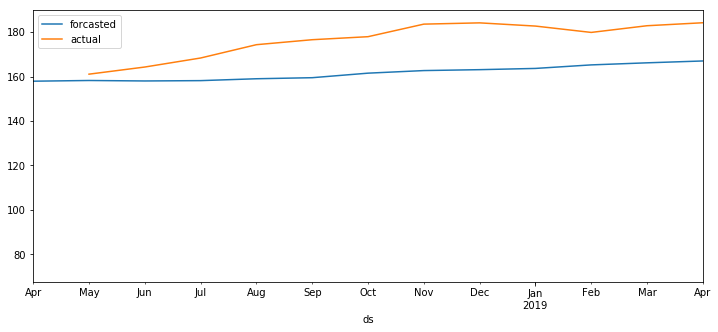

In [111]:
ax=forecast.plot(x='ds',y='yhat',label='forcasted',figsize=(12,5))
test.plot(x='ds',y='y',ax=ax,label='actual',xlim=('2018-04-01','2019-04-01'))

1. from earlier plot results, we observe some seasonality , to check it we will add one more componenets , as seasonality_mode='multiplicative ' and check the results of model
2. still the rmse is almost close with previous results so , we can finalize the model without seasonality

In [112]:
crude1=Prophet(seasonality_mode='multiplicative',interval_width=0.95)
crude1.fit(train)
future1=crude1.make_future_dataframe(12,freq='MS')
forecast1=crude1.predict(future1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [113]:
prediction1=forecast1[-12:]['yhat']
rmse(prediction1,test['y'])

15.577087675889885

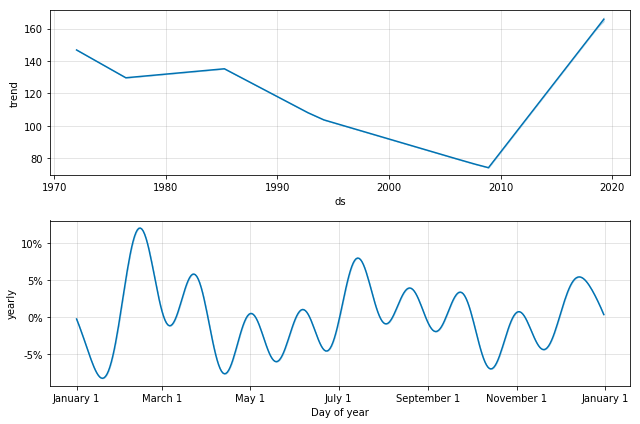

In [114]:
fig=crude1.plot_components(forecast1)

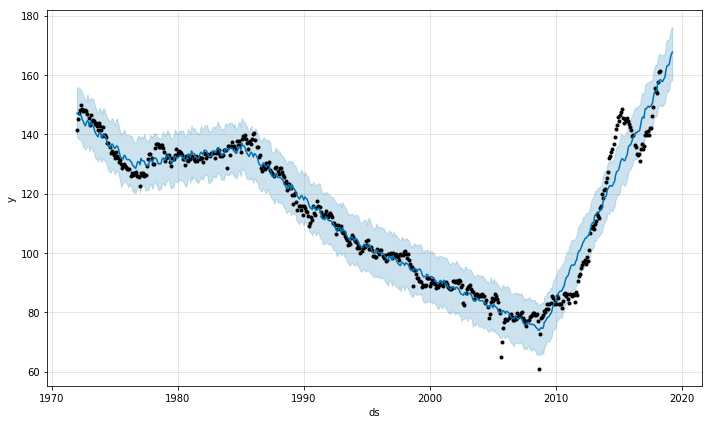

In [115]:
fig=crude1.plot(forecast1)

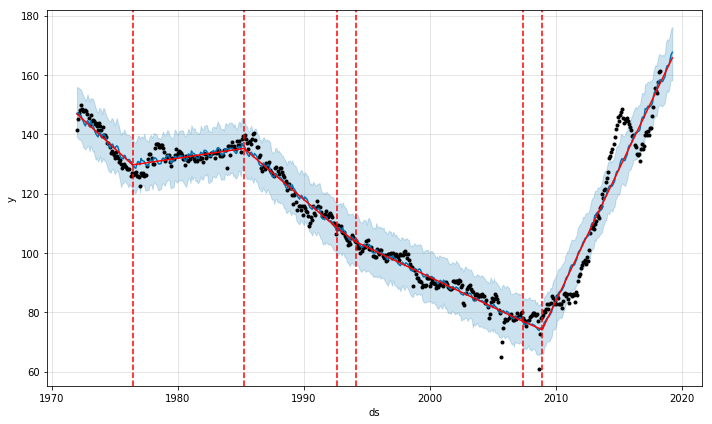

In [116]:
fig=crude1.plot(forecast1)
a=add_changepoints_to_plot(fig.gca(),crude1,forecast1)

### Use the model & Predict the future value for next 12 months

In [120]:
crude1=Prophet(seasonality_mode='multiplicative',interval_width=0.95)
crude1.fit(data)
future1=crude1.make_future_dataframe(12,freq='MS')
forecast1=crude1.predict(future1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [121]:
forecast1.iloc[568:]

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
568 2019-05-01  172.928182  164.152138  181.989100   172.928182   172.933030   
569 2019-06-01  173.772180  163.646076  180.908057   173.755397   173.823011   
570 2019-07-01  174.588952  163.737773  182.068359   174.509541   174.724726   
571 2019-08-01  175.432949  165.557298  182.911193   175.294081   175.680388   
572 2019-09-01  176.276947  166.665875  183.645188   176.056213   176.617336   
573 2019-10-01  177.093719  169.470310  187.268608   176.714635   177.547958   
574 2019-11-01  177.937716  170.843367  188.627525   177.445249   178.531514   
575 2019-12-01  178.754488  169.928203  187.944156   178.110720   179.476390   
576 2020-01-01  179.598486  171.343081  188.604743   178.825402   180.514258   
577 2020-02-01  180.442483  171.736826  189.480785   179.528677   181.462340   
578 2020-03-01  181.232029  172.675240  191.057969   180.146410   182.436002   
579 2020-04-01  182.076027  174.037429  191.311666   180.842048   183.475424   

     multiplicative_terms  multiplicative_terms_lower  \
568              0.000883                    0.000883   
569             -0.007052                   -0.007052   
570             -0.010162                   -0.010162   
571             -0.004983                   -0.004983   
572             -0.004909                   -0.004909   
573              0.005847                    0.005847   
574              0.008063                    0.008063   
575              0.002750                    0.002750   
576              0.002147                    0.002147   
577              0.002088                    0.002088   
578              0.005184                    0.005184   
579              0.001941                    0.001941   

     multiplicative_terms_upper    yearly  yearly_lower  yearly_upper  \
568                    0.000883  0.000883      0.000883      0.000883   
569                   -0.007052 -0.007052     -0.007052     -0.007052   
570                   -0.010162 -0.010162     -0.010162     -0.010162   
571                   -0.004983 -0.004983     -0.004983     -0.004983   
572                   -0.004909 -0.004909     -0.004909     -0.004909   
573                    0.005847  0.005847      0.005847      0.005847   
574                    0.008063  0.008063      0.008063      0.008063   
575                    0.002750  0.002750      0.002750      0.002750   
576                    0.002147  0.002147      0.002147      0.002147   
577                    0.002088  0.002088      0.002088      0.002088   
578                    0.005184  0.005184      0.005184      0.005184   
579                    0.001941  0.001941      0.001941      0.001941   

     additive_terms  additive_terms_lower  additive_terms_upper        yhat  
568             0.0                   0.0                   0.0  173.080916  
569             0.0                   0.0                   0.0  172.546784  
570             0.0                   0.0                   0.0  172.814777  
571             0.0                   0.0                   0.0  174.558775  
572             0.0                   0.0                   0.0  175.411545  
573             0.0                   0.0                   0.0  178.129212  
574             0.0                   0.0                   0.0  179.372449  
575             0.0                   0.0                   0.0  179.246076  
576             0.0                   0.0                   0.0  179.984168  
577             0.0                   0.0                   0.0  180.819185  
578             0.0                   0.0                   0.0  182.171508  
579             0.0                   0.0                   0.0  182.429469

### forecasting visualization of next 12 months

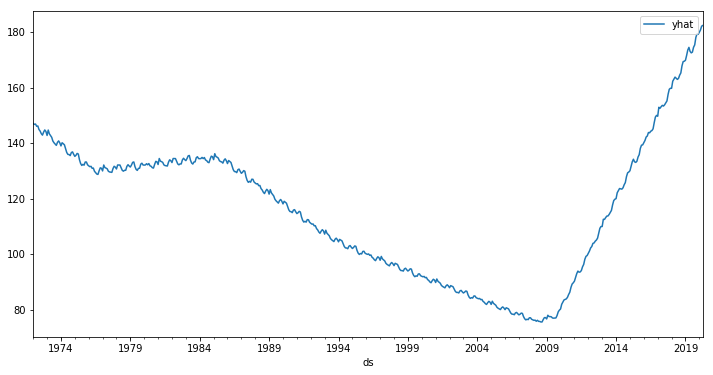

In [122]:
forecast1.plot(x='ds',y='yhat',figsize=(12,6))

## LSTM Keras

Earlier , we forecast the crude oil using facebook prophet and we got reasonable results , now lets try with deep learning library called Keras to predoct forecast for cruide oil.

1. import the keras library
2. from keras we have to import sequencial 
3. for prediction , we are using LSTM
4. ans also import Dense & TimeseriesGenerator

In [53]:
## LSTM Keras forecasting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
from statsmodels.tools.eval_measures import rmse

from sklearn.preprocessing import MinMaxScaler

from keras.preprocessing.sequence import TimeseriesGenerator

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


In [7]:
data1=pd.read_csv('IPG211111CN.csv',index_col='DATE',parse_dates=True).round(2)

In [8]:
data1.head()

IPG211111CN
DATE                   
1972-01-01       141.51
1972-02-01       145.17
1972-03-01       147.29
1972-04-01       148.22
1972-05-01       149.78

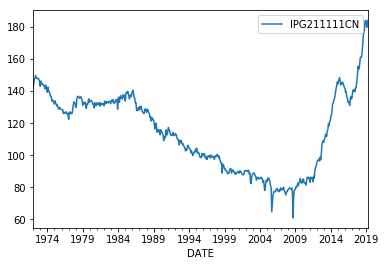

In [9]:
data1.plot()

In [10]:
len(data1)

568

In [353]:
train=data1.iloc[:556]
test=data1.iloc[556:]

1. Above code for analysis purpose is same as we did earliar with prophet, we just repeat it to avoid confusion.
2. In LSTM, as as target variable has not symmetrical dustrubution so, we are converting it into specific range like 0 - 1.
3. for that we are using sklearn MinMaxScaler functionality which convert ferature into 0-1 range
4. then apply it on train & test dataset

In [354]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

1. In Timeseriesgenerator, we are going to make batch of input and next one is its results
2. for example, if we set lenght=2 and batchsize=1, and where we want to apply it on then it convert dataset into as first 2 rows is input and third row is output and so on.

In [355]:
#Time series generator
generator=TimeseriesGenerator(scaled_train, scaled_train, length=2, batch_size=1)

In [356]:
len(scaled_train)

556

In [357]:
len(generator)

554

In [358]:
generator[0]

(array([[[0.80337191],
         [0.83988428]]]), array([[0.86103352]]))

we are setting TimeseriesGenerator parameter as

length=12,with 1 feauture and batchsize=1

1. now lets initalize th sequential() method
2. and add LSTM with first 100 neurons (this is starting range, later we can increase it with according to results)
2. add activation='tanh', here we add other activation function like sigmoid,relu and many other but I have tried with tanh and give me better results than others

In [383]:
n_inputs=12
n_features=1
generator_train=TimeseriesGenerator(scaled_train, scaled_train, length=n_inputs, batch_size=1)

In [384]:
model=Sequential()
model.add(LSTM(100,activation='tanh',input_shape=(n_inputs,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

1. This is the model summary where we have input of 100 neuron and with 40800 parameter

In [385]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


Now, lets run the above sequencial model with out timeseriesgenerator with iteration size with 30

In [386]:
model.fit_generator(generator_train,epochs=30)

Epoch 1/30
544/544 [==============================] - 7s 13ms/step - loss: 0.0033
Epoch 2/30
544/544 [==============================] - 4s 7ms/step - loss: 0.0014
Epoch 3/30
544/544 [==============================] - 4s 8ms/step - loss: 0.0011
Epoch 4/30
544/544 [==============================] - 4s 7ms/step - loss: 9.3574e-04
Epoch 5/30
544/544 [==============================] - 4s 7ms/step - loss: 8.0788e-04
Epoch 6/30
544/544 [==============================] - 4s 7ms/step - loss: 7.0172e-04
Epoch 7/30
544/544 [==============================] - 4s 7ms/step - loss: 6.4298e-04
Epoch 8/30
544/544 [==============================] - 4s 7ms/step - loss: 7.1705e-04
Epoch 9/30
544/544 [==============================] - 4s 7ms/step - loss: 6.2497e-04
Epoch 10/30
544/544 [==============================] - 4s 7ms/step - loss: 6.0475e-04
Epoch 11/30
544/544 [==============================] - 4s 7ms/step - loss: 6.1095e-04
Epoch 12/30
544/544 [==============================] - 4s 7ms/step - loss:

with epochs=30 , with above given parameter , we get the rsme loss of 5.1 , means we are very close to actual value

By this way we have train our model with LSTM , To predict it on test dataset we have to generate timeseries generator value from last 12 month of train dataset (here as we set lenght of 12 months because of that we are taking last 12 month data otherwise it will change according to length, so it all about checking again and again with different lenght value
)

from last 12 month as input data , and providing the shape as ((1, n_inputs, n_features)) we get predicted first value for for our test data is 1.0267408, now lets make prediciton on test data same way.

In [391]:
first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.79898244],
       [0.78461692],
       [0.80855946],
       [0.81055467],
       [0.84926177],
       [0.88128492],
       [0.94273743],
       [0.93316042],
       [0.92607741],
       [0.9650838 ],
       [0.99790503],
       [1.        ]])

In [392]:
first_eval_batch = first_eval_batch.reshape((1, n_inputs, n_features))
model.predict(first_eval_batch)

array([[1.0267408]], dtype=float32)

To make prediction on remaining test data

we are creating a list variable and above created reshape of dataset with given lenght and feature , we are predicitng the time series forecast for test data and append it on each time until all test data value get predicted

In [393]:
test_predictions = []

first_eval_batch = scaled_train[-n_inputs:]
current_batch = first_eval_batch.reshape((1, n_inputs, n_features))


for i in range (len(test)):
    my_pred=model.predict(current_batch)[0]
    test_predictions.append(my_pred)
    current_batch=np.append(current_batch[:,1:,:],[[my_pred]],axis=1)

Here is the list of predicted value 

In [394]:
test_predictions

[array([1.0267408], dtype=float32),
 array([1.0505887], dtype=float32),
 array([1.0742127], dtype=float32),
 array([1.0987709], dtype=float32),
 array([1.1245736], dtype=float32),
 array([1.1516305], dtype=float32),
 array([1.1798866], dtype=float32),
 array([1.2066], dtype=float32),
 array([1.2328627], dtype=float32),
 array([1.2594943], dtype=float32),
 array([1.2864575], dtype=float32),
 array([1.3134392], dtype=float32)]

This is our original test data values

In [395]:
scaled_test

array([[0.99840383],
       [1.03042698],
       [1.07092977],
       [1.13068635],
       [1.15303272],
       [1.16660016],
       [1.22296488],
       [1.22865124],
       [1.21428571],
       [1.18575419],
       [1.21578212],
       [1.22915004]])

Now inverse the prediciton value to its original from which we have converted using MinMaxScaler

In [396]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[163.90049673],
       [166.29101399],
       [168.65907807],
       [171.12079069],
       [173.7072565 ],
       [176.41944341],
       [179.25183073],
       [181.92957907],
       [184.56215815],
       [187.2317091 ],
       [189.93450367],
       [192.63915042]])

In [397]:
test['prediction']=true_predictions

C:\Users\e5547887\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Now lets plot the predicted value and original value with line grapg

1. from this graph, we get to know that our predicted values are higher than actual values and its didn't show any trend on predicted value, so it is failed to recongize any seasonality/trend.


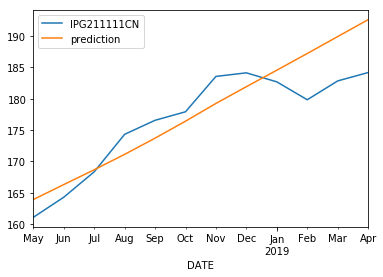

In [398]:
test.plot()

In [399]:
model.save('timeseries.h5')

In [400]:
from keras.models import load_model
new_model = load_model('timeseries.h5')

Save the above LSTM model for future use and to forecast the crude oil in future time,

for future time forecasting we have to repeat the same procedure which we have apllied for test dataset prediction

before finalizing the model let's evaluate this dataset with well known time series forecasting methods called ARIMA and others from statsmodels

## StatsModels

In [40]:
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
import warnings
from statsmodels.tools.eval_measures import rmse

In [25]:
warnings.filterwarnings('ignore')

In [3]:
data1=pd.read_csv('IPG211111CN.csv',index_col='DATE',parse_dates=True).round(2)
data1.index.freq='MS'
data1.head()

IPG211111CN
DATE                   
1972-01-01       141.51
1972-02-01       145.17
1972-03-01       147.29
1972-04-01       148.22
1972-05-01       149.78

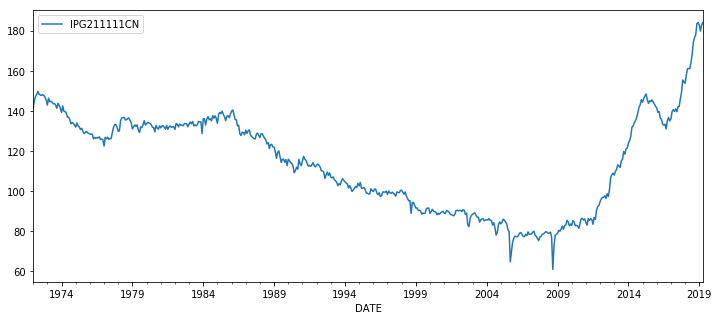

In [6]:
%matplotlib inline
data1.plot(figsize=(12,5))

In [14]:

adfuller_result=adfuller(data1['IPG211111CN'])
adfuller_result

(-0.6180449008794604,
 0.8668522663132674,
 13,
 554,
 {'1%': -3.4422089502693454,
  '5%': -2.866771178805824,
  '10%': -2.5695560476482164},
 2334.416244804447)

(<Figure size 432x288 with 4 Axes>,)

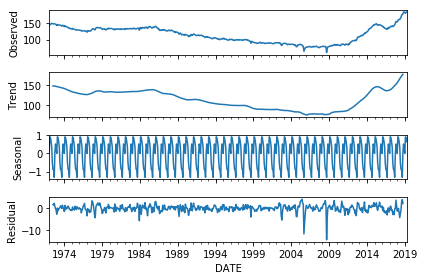

In [19]:
%matplotlib inline
seasonality_checks=seasonal_decompose(data1['IPG211111CN'],model='additive')
seasonality_checks.plot(),

In [65]:
auto_arima(data1['IPG211111CN'],seasonal=False).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  566
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -1203.211
Method:                       css-mle   S.D. of innovations              2.022
Date:                Wed, 29 May 2019   AIC                           2416.421
Time:                        07:39:15   BIC                           2438.114
Sample:                             2   HQIC                          2424.888
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.002      1.275      0.203      -0.001       0.006
ar.L1.D2.y    -0.1340      0.043     -3.108      0.002      -0.218      -0.049
ar.L2.D2.y    -0.0879      0.043     -2.040      0.042      -0.172      -0.003
ma.L1.D2.y    -0.9750      0.011    -86.824      0.000      -0.997      -0.953
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7624           -3.2863j            3.3735           -0.2863
AR.2           -0.7624           +3.2863j            3.3735            0.2863
MA.1            1.0256           +0.0000j            1.0256            0.0000
-----------------------------------------------------------------------------
"""

In [64]:
auto_arima(data1['IPG211111CN'],seasonal=False,stationary=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  568
Model:                     ARMA(4, 0)   Log Likelihood               -1216.748
Method:                       css-mle   S.D. of innovations              2.051
Date:                Wed, 29 May 2019   AIC                           2445.496
Time:                        07:38:56   BIC                           2471.548
Sample:                             0   HQIC                          2455.662
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        146.7925     29.873      4.914      0.000      88.241     205.343
ar.L1.y        0.9254      0.042     22.129      0.000       0.843       1.007
ar.L2.y        0.0486      0.057      0.854      0.393      -0.063       0.160
ar.L3.y        0.1044      0.057      1.827      0.068      -0.008       0.216
ar.L4.y       -0.0803      0.042     -1.907      0.057      -0.163       0.002
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0017           -0.0000j            1.0017           -0.0000
AR.2           -1.1287           -1.8951j            2.2057           -0.3355
AR.3           -1.1287           +1.8951j            2.2057            0.3355
AR.4            2.5564           -0.0000j            2.5564           -0.0000
-----------------------------------------------------------------------------
"""

In [66]:
stepwise_result=auto_arima(data1['IPG211111CN'],start_p=0,start_q=0,max_p=4,max_q=4,m=12,seasonal=False,d=None,trace=True,error_action='ignore'
                          ,suppress_warnings=True,stepwise=True)
stepwise_result.summary()

Fit ARIMA: order=(0, 2, 0); AIC=2862.724, BIC=2871.402, Fit time=0.004 seconds
Fit ARIMA: order=(1, 2, 0); AIC=2683.599, BIC=2696.615, Fit time=0.036 seconds
Fit ARIMA: order=(0, 2, 1); AIC=2424.390, BIC=2437.405, Fit time=0.150 seconds
Fit ARIMA: order=(1, 2, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.299 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  566
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1209.195
Method:                       css-mle   S.D. of innovations              2.043
Date:                Wed, 29 May 2019   AIC                           2424.390
Time:                        07:39:27   BIC                           2437.405
Sample:                             2   HQIC                          2429.470
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.002      1.370      0.171      -0.001       0.005
ma.L1.D2.y    -0.9836      0.008   -125.999      0.000      -0.999      -0.968
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0167           +0.0000j            1.0167            0.0000
-----------------------------------------------------------------------------
"""

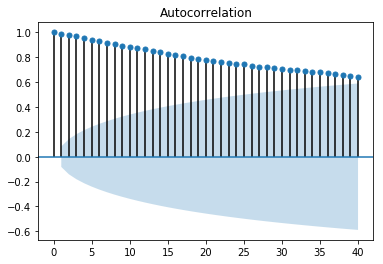

In [30]:
plot_acf(data1['IPG211111CN'],title='Autocorrelation',lags=40);

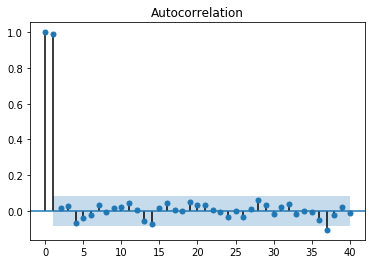

In [31]:
plot_pacf(data1['IPG211111CN'],title='Autocorrelation',lags=40);

In [32]:
len(data1)

568

In [34]:
train=data1.iloc[:556]
test=data1.iloc[556:]

In [85]:
model=ARIMA(train['IPG211111CN'],order=(2,2,1))
resultd=model.fit()
resultd.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.IPG211111CN   No. Observations:                  554
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -1171.045
Method:                       css-mle   S.D. of innovations              1.997
Date:                Wed, 29 May 2019   AIC                           2352.089
Time:                        07:42:48   BIC                           2373.675
Sample:                    03-01-1972   HQIC                          2360.522
                         - 04-01-2018                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0019      0.002      1.153      0.250      -0.001       0.005
ar.L1.D2.IPG211111CN    -0.1524      0.043     -3.514      0.000      -0.237      -0.067
ar.L2.D2.IPG211111CN    -0.0931      0.043     -2.145      0.032      -0.178      -0.008
ma.L1.D2.IPG211111CN    -0.9784      0.010    -93.928      0.000      -0.999      -0.958
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8187           -3.1743j            3.2781           -0.2902
AR.2           -0.8187           +3.1743j            3.2781            0.2902
MA.1            1.0221           +0.0000j            1.0221            0.0000
-----------------------------------------------------------------------------
"""

In [86]:
start=len(train)
end=len(train)+len(test)-1
prediction = resultd.predict(start=start,end=end,dynamic=False,typ='levels')
prediction

2018-05-01    161.924374
2018-06-01    162.842348
2018-07-01    163.684086
2018-08-01    164.519881
2018-09-01    165.365994
2018-10-01    166.213404
2018-11-01    167.061974
2018-12-01    167.912564
2019-01-01    168.765055
2019-02-01    169.619386
2019-03-01    170.475576
2019-04-01    171.333630
Freq: MS, dtype: float64

In [87]:
error=rmse(test['IPG211111CN'],prediction)
error

11.312468063752341

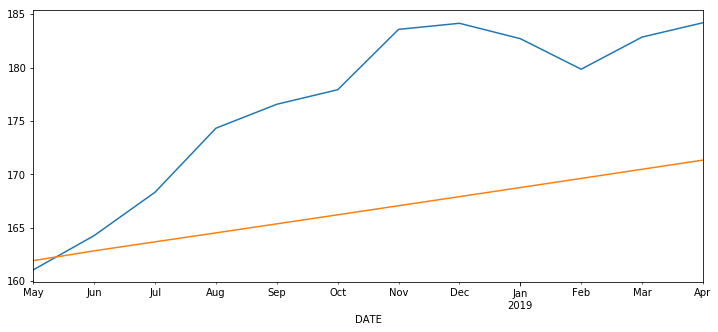

In [88]:
test['IPG211111CN'].plot(figsize=(12,5),label='actual data')
prediction.plot(figsize=(12,5),label='actual data')

In [89]:
model=ARIMA(data1['IPG211111CN'],order=(2,2,1))
resultd=model.fit()

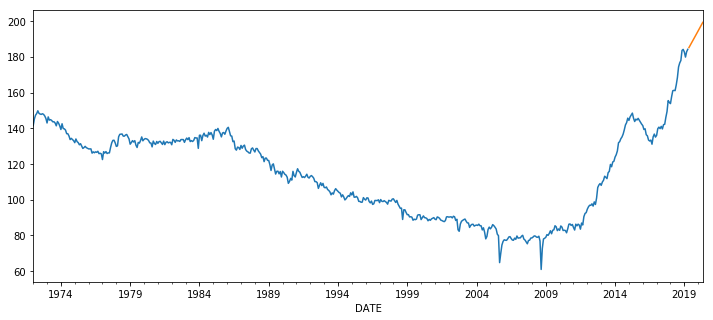

In [90]:
ax=data1['IPG211111CN'].plot(figsize=(12,5),label='actual data')
prediction1.plot()